<a href="https://colab.research.google.com/github/anturex2016/Computetional_intelligence_course/blob/main/Stock_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [126]:
#from google.colab import drive
#drive.mount('/content/drive')

In [127]:
! git clone https://github.com/anturex2016/Computetional_intelligence_course

fatal: destination path 'Computetional_intelligence_course' already exists and is not an empty directory.


In [128]:
dataset=pd.read_csv('Computetional_intelligence_course/Datasets/Google_Stock_Price_Train.csv',index_col="Date",parse_dates=True)

In [129]:
dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [130]:
dataset.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [131]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


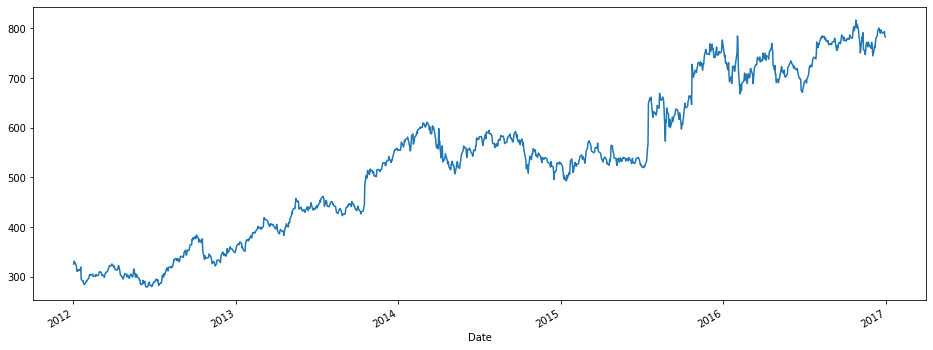

In [132]:
dataset['Open'].plot(figsize=(16,6))

In [133]:
dataset["Close"]=dataset["Close"].str.replace(',','').astype(float)

In [134]:
dataset["Volume"]=dataset["Volume"].str.replace(',','').astype(float)

**7 days rolling** **means**

In [135]:
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06


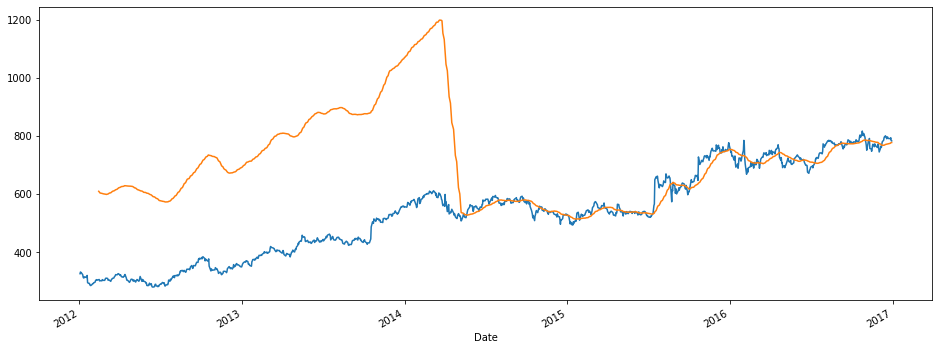

In [136]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

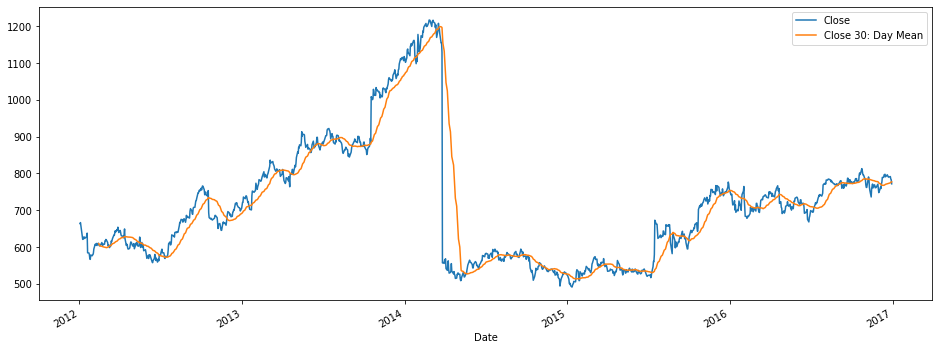

In [137]:
dataset['Close 30: Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close 30: Day Mean']].plot(figsize=(16,6))

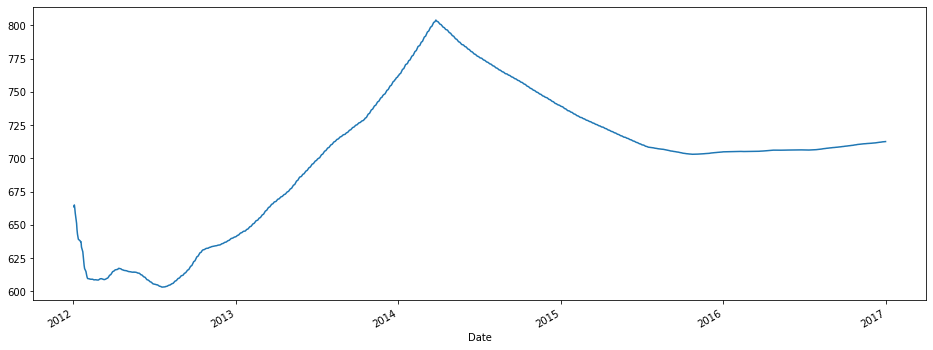

In [138]:
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [139]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)

In [140]:
training_set.shape

(1258, 1)

# Feature scalling

In [141]:
from sklearn.preprocessing import  MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [142]:
training_set_scaled.shape

(1258, 1)

# Data Stucture of 60 timesteps and 1 output

In [143]:
x_train = []
y_train = []
for i in range(60,1258):
  x_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1198, 60, 1)

# Creating RNN

In [144]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [145]:
regressor = Sequential()

In [146]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

**Compiling RNN and Fitting the RNN to training set**


In [147]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 9s 100ms/step - loss: 0.0887
Epoch 2/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0072
Epoch 3/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0044
Epoch 9/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0049
Epoch 10/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0045
Epoch 12/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0046
Epoch 13/100


In [148]:
dataset_test=pd.read_csv('Computetional_intelligence_course/Datasets/Google_Stock_Price_Test.csv',index_col="Date",parse_dates=True)

In [ ]:
real_stock_price = dataset_test.iloc[:,1:2].values



In [150]:
dataset_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [151]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [152]:
dataset_test['Volume']=pd.to_numeric(dataset_test.Close,errors='coerce')

In [ ]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)



**Pridicted stock price of 2017**

In [154]:
dataset_total=pd.concat((dataset['Open'],dataset_test['Open']),axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
x_test = []
for i in range(60, 80):
  x_test.append(inputs[i-60:i, 0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1], 1))
predicted_stock_price=regressor.predict(x_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)



** Result : **
**Accuracy:Error validation using means square error and root means square error** 

In [155]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(real_stock_price,predicted_stock_price)
rmse=np.sqrt(lms)


In [156]:
mse

403.42547032747666

In [157]:
rmse

18.636014243566297

In [158]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


**Visualization of the prediction**

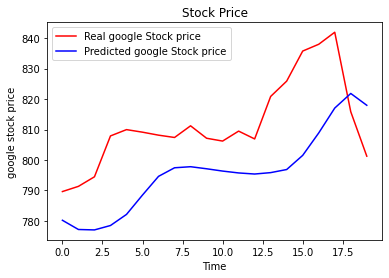

In [159]:
plt.plot(real_stock_price,color='red',label='Real google Stock price')
plt.plot(predicted_stock_price,color='blue',label='Predicted google Stock price')
plt.title('Stock Price')
plt.xlabel('Time')
plt.ylabel('google stock price')
plt.legend()
plt.show()